In [3]:
import pandas as pd 
import numpy as np
import random 
from matplotlib import pyplot as plt
import math
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
cd ANN

C:\Users\Berk\desktop\ANN


In [9]:
ds = pd.read_excel("cwurData.xlsx")
ds.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,2,Stanford University,USA,2,11,2,4,5,3,3,4,6,99.09,2014
1,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2,1,98.69,2014
2,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13,48,97.64,2014
3,6,Columbia University,USA,4,13,8,9,14,13,9,13,4,97.41,2014
4,7,"University of California, Berkeley",USA,5,4,22,6,7,4,3,7,28,92.84,2014


In [10]:
dt = pd.read_excel("test.xlsx") 
dt.head() 
# I couldn't use sklearn test-split library on my algorithm because it didn't create arrays from the split data. So I manually and randomly split the data on excel.


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1,2,100.00,2014
1,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12,16,97.51,2014
2,8,University of Chicago,USA,6,10,14,8,17,19,10,18,149,92.03,2014
3,10,Yale University,USA,8,9,25,11,18,7,32,19,45,88.11,2014
4,13,University of Tokyo,Japan,1,17,3,33,12,16,28,26,14,80.64,2014


In [11]:
x = ds["world_rank"]
y = ds["quality_of_education"]
xTest = dt["world_rank"]
yTest = dt["quality_of_education"]


In [12]:
len(x), len(xTest) # data is split as %80 - %20

(400, 100)

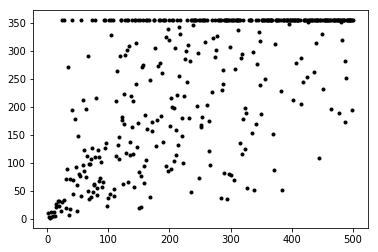

In [13]:
plt.plot(x,y,"k.") 

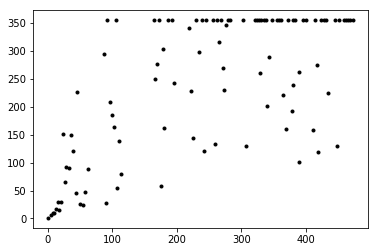

In [14]:
plt.plot(xTest,yTest,"k.")

In [37]:
# coefficients are assigned randomly between 0 and 1, as a matrix degree+1 rows and 1 column.
def coefficient(degree):  
    w = np.random.rand(degree+1,1)
    return w

In [16]:
def normalization(train):
    values = train.values
    values = values.reshape((len(values), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized 

In [17]:
def y_pred(w,feature,deg):  # the equation of w0 + w1x + w2x^2 + ....                        
    h = np.ones((feature.shape[0],1)) # creating a unit matrix with 400 rows and 1 column.
    w = w.reshape(1,deg+1) 
    for i in range(0,feature.shape[0]):
        xarr = np.ones(deg+1)
        for j in range(0,deg+1):
            xarr[j] = pow(feature[i],j)
        xarr = xarr.reshape(deg+1,1)
        h[i] = float(np.matmul(w,xarr))
    h = h.reshape(feature.shape[0])
#     plt.plot(normalization(x),y,"k.") #   run with these 2 lines if you want to see
#     plt.plot(feature,h,"r-")          #   the change in every step.
    return h

In [35]:
def gradient_descent(w,lrate,epoch,h,feature,y,deg):
    feature = feature.flatten()
    for i in range(0,epoch):
        w[0] = w[0]- (lrate/feature.shape[0])* sum(h-y)
        for j in range(1,deg+1):
            w[j]=w[j]-(lrate/feature.shape[0])*sum((h-y)*pow(feature,j))
        h = y_pred(w,feature,deg)
#       RMSE= math.sqrt((1/feature.shape[0])* sum(np.square(h-y)))
        RMSE = math.sqrt(mean_squared_error(y,h))
#       print("RMSE: {} ".format(RMSE))
    w = w.reshape(1,deg+1)
    print("RMSE: {} ".format(RMSE))
    print("updated coefficients: {}" .format(w))
    plt.plot(normalization(x),y,"k.")
    plt.plot(feature,h,"r-")
    testRMSE(w,deg)

In [19]:
def testRMSE(w,deg):#takes the updated coefficents from gradient_descent method.Calculates the test RMSE.
    h=y_pred(w,normalization(xTest),deg)
    testRMSE = math.sqrt(mean_squared_error(yTest,h))
    print("Test RMSE: {} ".format(testRMSE))

In [20]:
def poly_regression(x,y,deg,lrate,epoch):
    w = coefficient(deg)
    print("coefficients: {}".format(w.reshape(deg+1)))
    h = y_pred(w,x,deg)
    gradient_descent(w,lrate,epoch,h,x,y,deg) 

coefficients: [0.20189475]
RMSE: 122.2341173476129 
updated coefficients: [[245.8325]]
Test RMSE: 125.3511282607779 


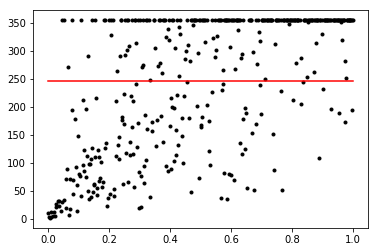

In [36]:
poly_regression(normalization(x),y,0,0.8,2000)

coefficients: [0.72127294 0.60149505]
RMSE: 97.64329230935132 
updated coefficients: [[117.58129276 254.88761443]]
Test RMSE: 95.09476648884565 


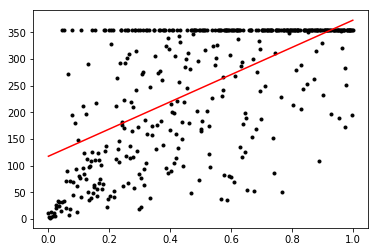

In [157]:
poly_regression(normalization(x),y,1,0.8,2000)

coefficients: [0.9380818  0.68368147 0.93151398]
RMSE: 94.95421094311568 
updated coefficients: [[  64.86809537  559.38040252 -298.73267591]]
Test RMSE: 86.93186996773932 


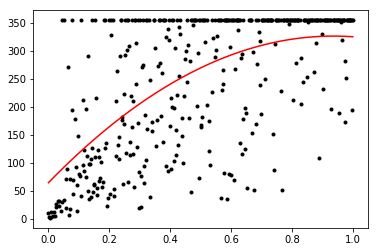

In [158]:
poly_regression(normalization(x),y,2,0.8,2000)

coefficients: [0.97545016 0.13226485 0.23331059 0.31585394]
RMSE: 95.19459148870052 
updated coefficients: [[  73.76833095  477.3229817  -124.87978285 -102.6746455 ]]
Test RMSE: 87.72891967510928 


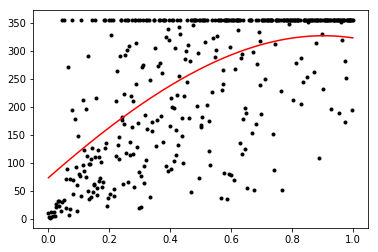

In [159]:
poly_regression(normalization(x),y,3,0.8,2000)

coefficients: [0.64221906 0.02285709 0.50769552 0.27325258 0.97623684]
RMSE: 95.1023006274717 
updated coefficients: [[  73.79766864  487.44201554 -147.81752425 -123.38818104   38.30358192]]
Test RMSE: 87.68428080899068 


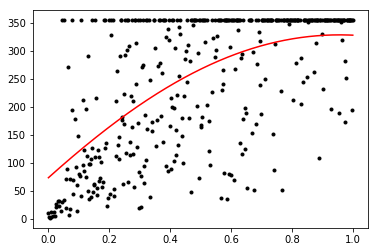

In [160]:
poly_regression(normalization(x),y,4,0.8,2000)

coefficients: [0.24495417 0.32997726 0.37870058 0.39214356 0.54242254 0.01301783]
RMSE: 94.96595620457236 
updated coefficients: [[  70.50081243  511.25105716 -154.72796832 -162.4185114   -26.30546724
    97.30599575]]
Test RMSE: 87.13927345139076 


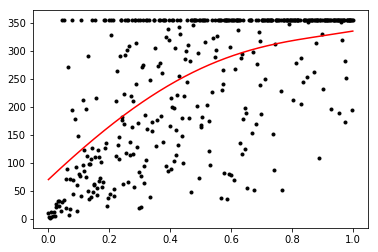

In [161]:
poly_regression(normalization(x),y,5,0.8,2000)

coefficients: [0.69526281 0.33098465 0.25205513 0.44866035 0.14456536 0.75169512
 0.24903166]
RMSE: 94.9391997286707 
updated coefficients: [[  68.03280658  522.31091211 -143.59354884 -174.16022758  -65.19166227
    35.80120627   98.50473491]]
Test RMSE: 86.64893633261957 


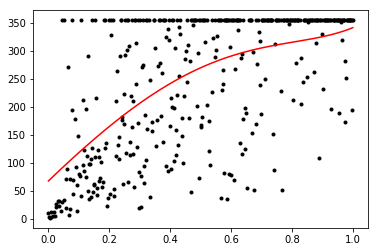

In [162]:
poly_regression(normalization(x),y,6,0.8,2000)

coefficients: [0.91739791 0.55667903 0.6044494  0.87362332 0.8887738  0.76204149
 0.67510563 0.27851103]
RMSE: 94.97646905585178 
updated coefficients: [[  67.30863281  521.65695505 -130.64642467 -169.67337664  -76.51127483
     6.8143363    54.64536637   71.42436476]]
Test RMSE: 86.40972491250159 


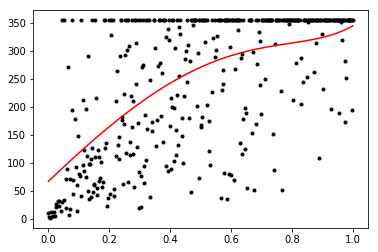

In [163]:
poly_regression(normalization(x),y,7,0.8,2000)

coefficients: [0.53519711 0.66838271 0.12458998 0.56201371 0.68860385 0.27715094
 0.88729803 0.98315387 0.4914551 ]
RMSE: 95.01125751205865 
updated coefficients: [[  67.69193944  516.54670824 -123.04317561 -162.00629784  -75.37951779
    -1.09325546   38.60393468   47.79219081   36.56308702]]
Test RMSE: 86.38720865921721 


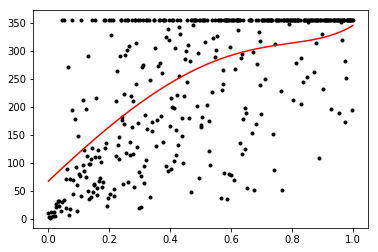

In [164]:
poly_regression(normalization(x),y,8,0.8,2000)

coefficients: [0.42496045 0.79104162 0.85879669 0.8078607  0.27364278 0.12306359
 0.42378222 0.54747494 0.748536   0.19826564]
RMSE: 95.01835914580538 
updated coefficients: [[ 6.84265477e+01  5.11781411e+02 -1.20692375e+02 -1.57457304e+02
  -7.19909650e+01  3.82826883e-01  3.69027955e+01  4.30921295e+01
   2.96405541e+01  4.31208387e+00]]
Test RMSE: 86.49419491895992 


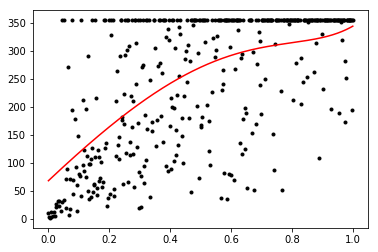

In [165]:
poly_regression(normalization(x),y,9,0.8,2000)

coefficients: [0.09534262 0.4407915  0.17914632 0.11641277 0.15677953 0.69475247
 0.35887766 0.95565919 0.69731261 0.0231626  0.89210484]
RMSE: 94.99658858784606 
updated coefficients: [[  68.99451462  509.78263038 -122.49509677 -157.41929719  -69.81725848
     4.25484619   40.68144163   47.55369836   33.63079724    8.02590233
   -21.31695895]]
Test RMSE: 86.6531569116846 


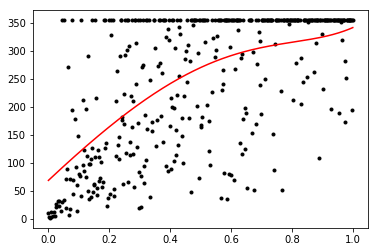

In [166]:
poly_regression(normalization(x),y,10,0.8,2000)

coefficients: [0.36603093 0.36522485 0.20203618 0.78797005 0.78476432 0.95164348
 0.01258789 0.08643047 0.64067341 0.8658321  0.91521394 0.82104395]
RMSE: 94.95859769563684 
updated coefficients: [[  69.28658234  510.08466747 -125.97559953 -159.73334387  -69.92607292
     6.41867651   44.75880873   53.32362831   42.09377418   18.95347383
    -9.9212917   -40.67207333]]
Test RMSE: 86.8178178193133 


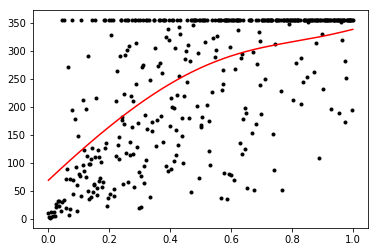

In [167]:
poly_regression(normalization(x),y,11,0.8,2000)

coefficients: [0.19723218 0.90910641 0.3053641  0.70554494 0.40121745 0.1674505
 0.51852275 0.34113857 0.75031527 0.23543269 0.97459224 0.42813077
 0.17452417]
RMSE: 94.91236719205675 
updated coefficients: [[  69.27354908  512.16058074 -129.30209794 -164.00214812  -72.80353633
     5.882753     48.56095166   59.86587477   51.26225769   29.87085659
     3.88053336  -25.40983979  -54.12408735]]
Test RMSE: 86.96462900100214 


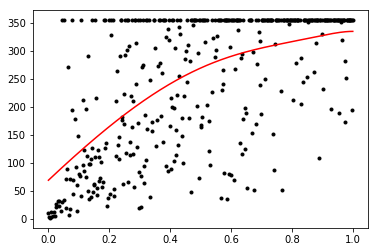

In [168]:
poly_regression(normalization(x),y,12,0.8,2000)

coefficients: [0.97644983 0.032305   0.16477749 0.51706531 0.61680444 0.57324914
 0.11737739 0.94641683 0.64902746 0.79782288 0.45039185 0.95035262
 0.90878076 0.13811108]
RMSE: 94.86809979754744 
updated coefficients: [[  69.06080874  515.04648458 -131.88451157 -168.90673325  -76.62512965
     4.48199455   49.25867299   64.66393766   58.38054625   40.48641259
    15.9953367    -9.92615702  -36.36429908  -62.21232619]]
Test RMSE: 87.08529440859863 


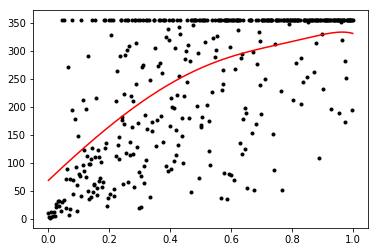

In [169]:
poly_regression(normalization(x),y,13,0.8,2000)

coefficients: [0.39180344 0.07801303 0.45944929 0.61220724 0.03800545 0.90625408
 0.11227134 0.68188619 0.8193439  0.54452187 0.64200573 0.58428457
 0.83396706 0.94286643 0.0990927 ]
RMSE: 94.8301042568161 
updated coefficients: [[  68.71721992  518.21464525 -133.56820537 -173.28223096  -81.60612573
     2.05967072   48.96855418   66.93284645   63.97160065   48.4535676
    27.0373168     2.98002983  -20.96551282  -43.95104828  -66.12402953]]
Test RMSE: 87.17874769290934 


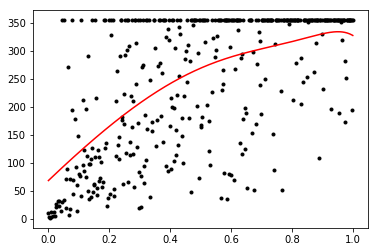

In [170]:
poly_regression(normalization(x),y,14,0.8,2000)

coefficients: [0.29835201 0.20724519 0.60783454 0.68427041 0.37882298 0.07467861
 0.93764336 0.98950088 0.45409624 0.3298853  0.70236505 0.42984688
 0.61779583 0.73768987 0.10019067 0.23458448]
RMSE: 94.80074188655885 
updated coefficients: [[  68.30620627  521.32985668 -134.51940113 -177.0874769   -85.75043814
    -2.28882025   48.18974469   68.0400158    67.00811839   54.26227757
    35.65702228   13.7774228    -8.0095091   -28.94647857  -49.05819833
   -66.53205215]]
Test RMSE: 87.24716784383455 


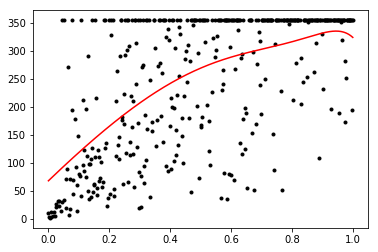

In [171]:
poly_regression(normalization(x),y,15,0.8,2000)

coefficients: [0.24979296 0.90968712 0.97602677 0.74396414 0.8686079  0.78194101
 0.80107644 0.01233893 0.18630845 0.85470435 0.6301845  0.06257139
 0.68453163 0.50336267 0.07743514 0.45992718 0.87029634]
RMSE: 94.78091409952604 
updated coefficients: [[  67.89036789  524.09763604 -134.85774365 -180.23669645  -89.36751356
    -5.22444675   45.77756405   66.68051291   68.51383024   58.80686261
    41.83338183   21.8050675     2.47937886  -16.8691765   -35.02467343
   -50.65047802  -64.46437309]]
Test RMSE: 87.29437959998853 


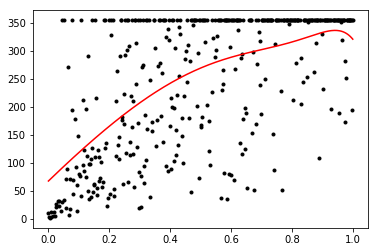

In [172]:
poly_regression(normalization(x),y,16,0.8,2000)

coefficients: [0.58420505 0.80354056 0.2791707  0.79331773 0.53336617 0.04202655
 0.03155982 0.27458279 0.75402306 0.77110842 0.46243161 0.73518167
 0.28471925 0.83861288 0.01641489 0.97508565 0.87357498 0.9802843 ]
RMSE: 94.76983780797282 
updated coefficients: [[  67.50310065  526.3485879  -134.72752498 -181.78821998  -92.68458404
    -9.14688159   42.52089051   65.74144683   69.51667187   60.97514277
    45.79944964   28.48340148    9.89964273   -6.98565756  -23.9112855
   -37.44425926  -50.36475506  -61.46342233]]
Test RMSE: 87.32435188775996 


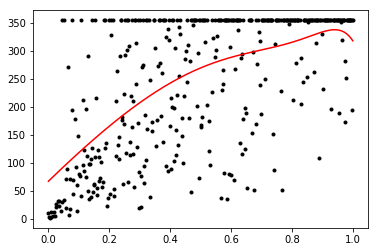

In [173]:
poly_regression(normalization(x),y,17,0.8,2000)

coefficients: [0.68187109 0.36045378 0.68605308 0.3738178  0.58813568 0.55161578
 0.20757955 0.67361292 0.87722065 0.49877866 0.19319438 0.44449813
 0.0927152  0.79935599 0.59172264 0.65207154 0.7990144  0.72566688
 0.54279101]
RMSE: 94.76606551472142 
updated coefficients: [[ 6.71738266e+01  5.27913052e+02 -1.33469996e+02 -1.83614042e+02
  -9.55022991e+01 -1.19441124e+01  3.97889705e+01  6.42101131e+01
   6.90529892e+01  6.16678398e+01  4.81451850e+01  3.24808241e+01
   1.56427346e+01  4.99590040e-01 -1.42987065e+01 -2.73044635e+01
  -3.86430387e+01 -4.86813691e+01 -5.74273769e+01]]
Test RMSE: 87.34082566889704 


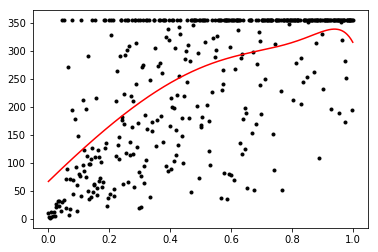

In [174]:
poly_regression(normalization(x),y,18,0.8,2000)

coefficients: [0.75149159 0.54294236 0.67199795 0.51945516 0.97256947 0.3251995
 0.9950435  0.73815747 0.52385057 0.53829473 0.42916397 0.85189529
 0.45750476 0.9640947  0.26625925 0.63496438 0.26626261 0.05462543
 0.94449377 0.09967386]
RMSE: 94.76766107749073 
updated coefficients: [[  66.89348544  529.1094091  -132.4654845  -184.22416357  -97.34401496
   -15.08276584   37.70733176   62.00052256   67.39867127   61.61871267
    49.6407417    35.55841107   20.09967253    6.15528729   -7.78018833
   -19.18456586  -29.81404461  -38.83835181  -45.43302337  -52.57654209]]
Test RMSE: 87.34639077464287 


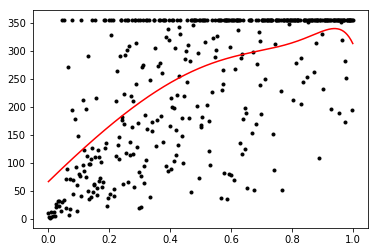

In [175]:
poly_regression(normalization(x),y,19,0.8,2000)

coefficients: [0.48670235 0.35388768 0.7112011  0.50379004 0.59668269 0.60325081
 0.10829232 0.34026075 0.72271728 0.58530857 0.13213697 0.34411857
 0.36557674 0.288107   0.83241207 0.47165133 0.46738039 0.17360305
 0.8456311  0.82745859 0.72737318]
RMSE: 94.7731129614646 
updated coefficients: [[  66.69003172  529.74873333 -131.20500566 -184.27022156  -98.96819712
   -16.74945546   34.72772232   59.80638707   66.42172883   61.32958014
    49.98478574   36.74570689   22.78969045    9.34996897   -2.27421719
   -13.37287217  -22.64596682  -30.8092879   -36.7304601   -42.20887467
   -46.78146843]]
Test RMSE: 87.34486031769381 


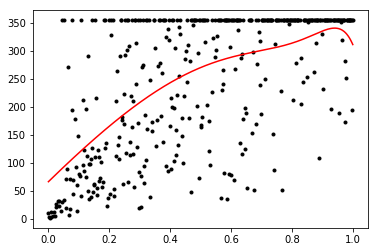

In [176]:
poly_regression(normalization(x),y,20,0.8,2000)

coefficients: [0.21348837 0.37630233 0.02092479 0.17277416 0.24736373 0.72221574
 0.17074    0.63545004 0.27373441 0.7961093  0.56631226 0.22277298
 0.74228805 0.18417287 0.15673301 0.11953028 0.42386044 0.66635776
 0.6420999  0.69138294 0.40159803 0.73033831]
RMSE: 94.78018746723016 
updated coefficients: [[  66.52288317  530.20360116 -130.20948149 -183.95874278 -100.00472351
   -18.25155942   32.74698035   58.08408566   64.32485109   60.50775398
    50.16687523   37.25621909   24.73955264   11.78430075    0.55334998
    -9.27368217  -17.31848726  -24.06176868  -29.83607139  -34.44709346
   -38.45378083  -41.03572051]]
Test RMSE: 87.33713170367851 


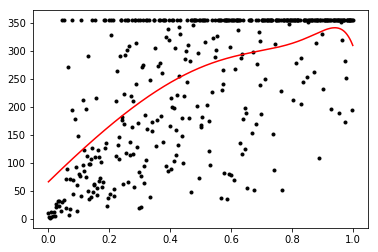

In [177]:
poly_regression(normalization(x),y,21,0.8,2000)

coefficients: [0.25886007 0.80101021 0.44336327 0.6648191  0.67829226 0.39316979
 0.03079436 0.65978275 0.43667656 0.83442201 0.98281561 0.32082357
 0.89338984 0.67992662 0.52700722 0.83301312 0.2823268  0.93504093
 0.97476111 0.8025343  0.07373942 0.11979115 0.62874655]
RMSE: 94.78943159050456 
updated coefficients: [[  66.43739696  530.10620532 -128.96643454 -183.15759901 -100.21009394
   -19.9871472    30.7711953    56.18074607   62.74876948   59.21009249
    49.80519624   37.23957173   25.50664001   13.66454181    3.09244628
    -5.60737972  -13.73522172  -19.31657828  -24.30112467  -28.43751395
   -32.21895048  -34.45236247  -35.57369818]]
Test RMSE: 87.32691247763093 


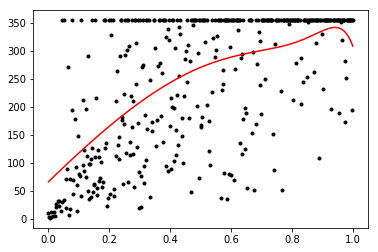

In [178]:
poly_regression(normalization(x),y,22,0.8,2000)

coefficients: [0.97680257 0.33283861 0.20791542 0.48645664 0.53872158 0.99684322
 0.00226725 0.93880262 0.07338709 0.29377289 0.28668216 0.591438
 0.96489243 0.56812518 0.54130445 0.78893594 0.21823715 0.3696303
 0.55354097 0.45927192 0.41104673 0.11032048 0.35445347 0.85213232]
RMSE: 94.79764333516519 
updated coefficients: [[  66.38595314  529.90857285 -127.90736196 -182.60542304 -100.51107365
   -20.27109695   29.42200092   54.99216474   61.00868565   57.56642025
    48.41357395   37.31550655   25.94564183   14.51927798    4.69068028
    -3.44551619  -10.97683844  -16.45570653  -20.71007233  -24.2037956
   -26.76346567  -28.8272746   -29.72248197  -29.84898233]]
Test RMSE: 87.31479448029934 


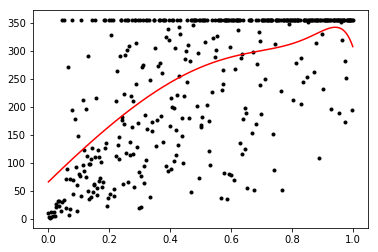

In [179]:
poly_regression(normalization(x),y,23,0.8,2000)

coefficients: [0.18829828 0.47783135 0.80375284 0.09824897 0.20470909 0.23251704
 0.36516125 0.78259564 0.10054573 0.30924654 0.86142106 0.42741419
 0.1067258  0.48522921 0.96295896 0.31684497 0.24572078 0.03538337
 0.04557962 0.38447337 0.74084247 0.02804936 0.7862203  0.71930561
 0.48175132]
RMSE: 94.8055844185034 
updated coefficients: [[  66.38533155  529.35159785 -126.42846336 -182.11213845 -100.56313385
   -21.39409987   28.9504438    53.73890537   59.87604542   56.5258334
    48.16609265   36.66022173   24.99661524   14.79306339    5.94616609
    -2.59056256   -9.12335114  -14.46699709  -18.40586758  -20.98912666
   -22.68175714  -24.71205271  -24.66579579  -24.94835646  -24.99869745]]
Test RMSE: 87.30266690398302 


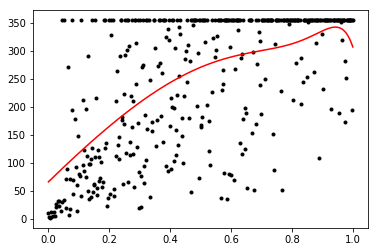

In [180]:
poly_regression(normalization(x),y,24,0.8,2000)

coefficients: [0.39304456 0.12818902 0.78138418 0.18556278 0.05815347 0.9589368
 0.36560061 0.41395808 0.82479601 0.62009356 0.04989797 0.11373495
 0.39872077 0.75387924 0.4703738  0.31317214 0.07726929 0.19795617
 0.91797987 0.19776827 0.43242115 0.86547456 0.22670139 0.83562516
 0.13723237 0.14334044]
RMSE: 94.81230666705468 
updated coefficients: [[  66.40868925  528.82784947 -125.58944681 -181.30459541 -100.54353203
   -21.06737243   28.12267255   52.28665745   59.42476894   55.70758635
    46.38225902   35.61548679   24.86115501   14.98204384    5.75133692
    -1.90087097   -8.19355521  -12.79886556  -15.62336742  -18.86785316
   -20.29384685  -20.80152459  -21.78844766  -21.04534816  -21.22120392
   -20.38337815]]
Test RMSE: 87.2907657730358 


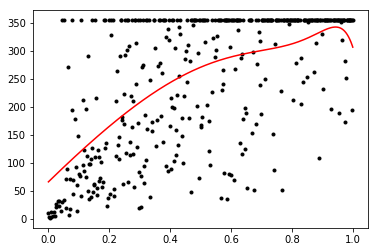

In [181]:
poly_regression(normalization(x),y,25,0.8,2000)

coefficients: [0.51603414 0.40294344 0.6388412  0.982475   0.29189143 0.14964923
 0.60634485 0.26836064 0.37996723 0.85924445 0.53598013 0.03661661
 0.19877636 0.04082747 0.70952484 0.92880826 0.53628915 0.83719551
 0.40674829 0.64920546 0.9944698  0.55740561 0.55416089 0.20084159
 0.65057795 0.56844183 0.52673295]
RMSE: 94.81786535854052 
updated coefficients: [[  66.45612256  528.29060268 -125.3034709  -179.85181824  -99.92946862
   -21.90702966   27.95751115   51.45911407   58.13598789   55.04778647
    46.00630571   34.78824282   24.08197433   13.90555861    5.87590773
    -1.12767021   -7.2894268   -11.41787639  -15.09208705  -17.07291016
   -18.09007198  -19.17471224  -19.23973625  -19.18055494  -17.93889906
   -16.92948483  -15.64656733]]
Test RMSE: 87.28015919048676 


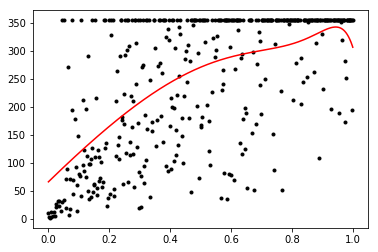

In [182]:
poly_regression(normalization(x),y,26,0.8,2000)

coefficients: [0.20441743 0.10599613 0.03335127 0.35524936 0.5435025  0.66648189
 0.42817679 0.05661233 0.46310299 0.56710878 0.23541054 0.32844279
 0.69990494 0.33359273 0.20947871 0.92325981 0.36715456 0.54435989
 0.33565115 0.97721754 0.41214215 0.94591847 0.45375973 0.10841643
 0.07679436 0.92606583 0.12002117 0.10880565]
RMSE: 94.6532553036401 
updated coefficients: [[  60.96917544  575.18381939 -188.63850201 -210.96248228  -92.7111515
     4.87438982   58.1880588    77.05168993   75.59162332   62.90427406
    45.47967755   28.0842735    12.65983782   -0.85487087  -11.19280999
   -17.84075502  -23.17460722  -25.53568137  -26.40199403  -24.87733442
   -23.3240881   -19.70212248  -16.36147677  -12.31741903   -7.55797278
    -1.64230529    2.79126428    8.11102529]]
Test RMSE: 87.07122841570812 


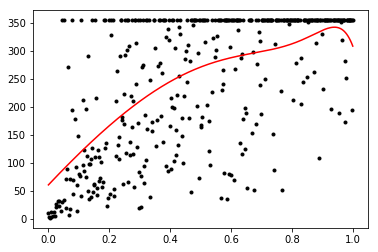

In [183]:
poly_regression(normalization(x),y,27,0.8,3000)